## Importing data file and initial analysis

In [1]:
import pandas as pd
from nltk.stem import SnowballStemmer 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('datasets/games.csv')

In [3]:
def basic_info(data):
    print(data.info())
    print()
    print(data.describe())
    print()
    print(data.head(10))

In [4]:
basic_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.8

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Conclusions**

1. There is very little data on game ratings - if they cannot be assessed, then the question will be - how to assess the prospects of games for the future - there are not many other possible indicators in the table. 
2. There is no name and genre in 2 (maybe they are the same?)
3. Year in float format - we can convert it in int, or in the date format if we need them. Sales - can multiply by * 1000 in int? user ratings in object for some reason?
4. Names could be change into proper format

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preprocessing

### Column names

In [7]:
columns_dict = {}
columns_init = df.columns
for name in columns_init:
    columns_dict[name] = name.lower()

In [8]:
columns_dict

{'Name': 'name',
 'Platform': 'platform',
 'Year_of_Release': 'year_of_release',
 'Genre': 'genre',
 'NA_sales': 'na_sales',
 'EU_sales': 'eu_sales',
 'JP_sales': 'jp_sales',
 'Other_sales': 'other_sales',
 'Critic_Score': 'critic_score',
 'User_Score': 'user_score',
 'Rating': 'rating'}

In [9]:
df.rename(columns=columns_dict, inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Conclusions**

The columns have been renamed. It was possible to rename some columns some more (year_of_release to just year), but I think it's not critical

### Missing data

#### name + genre

In [10]:
df.query('name.isna() or genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [12]:
df.query('platform == "GEN"')['year_of_release'].value_counts()

1994.0    12
1993.0     9
1992.0     6
1991.0     1
1990.0     1
Name: year_of_release, dtype: int64

2 missing values are not important - they don't have genre data and  ratings. Only the year and the amount of revenue.

The games were released on a platform that is outdated and therefore can't be used to predict anything. 

But this records are useful for a general assessment of revenue by year. Therefore, although we can drop them , we can replace it with unknown for now

In [13]:
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### year_of_release

In [15]:
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
df.query('year_of_release.isna()')['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [17]:
df.query('platform == "PS2"')['year_of_release'].value_counts()

2002.0    280
2005.0    260
2004.0    259
2006.0    259
2003.0    256
2007.0    214
2008.0    191
2001.0    185
2009.0     96
2000.0     82
2010.0     38
2011.0      7
Name: year_of_release, dtype: int64

We don't want to lose 269 records

1. Some of the platforms where this games were realeased were active for a small tie window. So we can assume that game was released in that small time window

2. some of the games have a year in their names, but decided not use it right now.

3. We can have games with the same name. WHile they can be released not in the same years (since porting game takes time), but it's another way how we can fillna with higher accuracy

So I filled na with the year for the games with the same name. If it was not possible - used the average of other games for that platform

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
x = pd.pivot_table(df, values='year_of_release', index='name', aggfunc='median')
x =x.round(0)
df = df.merge(x, how='left', left_on ='name', right_index= True)
df['year_of_release_x'] = df['year_of_release_x'].fillna(df['year_of_release_y'])
df = df.drop(axis=1, columns='year_of_release_y')
df = df.rename(columns = {'year_of_release_x': 'year_of_release'})

In [20]:
x = pd.pivot_table(df, values='year_of_release', index='platform', aggfunc='mean')
x =x.round(0)

In [21]:
x.head(5)

,year_of_release
platform,
2600,1982.0
3DO,1995.0
3DS,2013.0
DC,2000.0
DS,2008.0


In [22]:
df = df.merge(x, how='left', left_on ='platform', right_index= True)

In [23]:
df['year_of_release_x'] = df['year_of_release_x'].fillna(df['year_of_release_y'])
df = df.drop(axis=1, columns='year_of_release_y')
df = df.rename(columns = {'year_of_release_x': 'year_of_release'})

In [24]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Conclusions**

1. Gaps in release years were filled by have the games with the same name realeased on the same year (because this games released on different platforms). When it didn't help the average year of games on the same platform was used 

#### critic_score + user_score

In [25]:
df['user_score'] = df['user_score'].fillna(-1)  
df['critic_score'] = df['critic_score'].fillna(-1)  

In [26]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


In [27]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


In [28]:
df.loc[df['user_score'] == "tbd", 'user_score'] = -1

**Conclusions**

1. It is not clear how we can fill missing values for this column. For now we can fill them with -1 to indicate that we don't know about them

#### rating

In [29]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [30]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [31]:
df['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

K-A - former name for E

In [32]:
df.query('rating.isna()')['year_of_release'].value_counts()

2010.0    462
2008.0    459
2011.0    445
2009.0    428
2007.0    376
1998.0    350
2006.0    329
1999.0    299
2012.0    298
2015.0    291
1997.0    270
1996.0    257
2005.0    242
2014.0    236
2013.0    230
2016.0    222
1995.0    219
2000.0    203
2002.0    175
2003.0    167
2004.0    166
2001.0    143
1994.0    120
1993.0     62
1982.0     52
1981.0     46
1992.0     41
1991.0     41
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

In [33]:
df.query('rating.isna()')['platform'].value_counts()

PS      989
DS      878
PS2     680
PSP     665
PS3     379
N64     319
Wii     318
GBA     300
3DS     292
PSV     279
SNES    239
X360    210
PC      200
SAT     173
PS4     137
2600    133
GB       98
NES      98
XB       91
GC       87
XOne     61
WiiU     42
DC       38
GEN      29
NG       12
SCD       6
WS        6
3DO       3
TG16      2
GG        1
PCFX      1
Name: platform, dtype: int64

In [34]:
df.query('genre == "Sports"')['rating'].value_counts()

E       1188
T        198
E10+     107
M         16
Name: rating, dtype: int64

There were several hypotheses -
1. The ESRB does not rate certain platform games/old games, etc. But it was a wrong assumption.
2. There are game names - many of them have recurring series titles. We can use it to fill in missing values
3. Different genres might correlate to different rating.

Decided to do it like this:
1. Highlight repetitive names in game titles - based on them, create a list of words and what genres they are associated with
2. Check if there are the same words in the games, make up the probability of their inclusion in the rating based on this
3. If there are few matches (less than 5?), then do not use it to assume rating
4. For those who are not rated - use probabilities for the genre they belong to

In [35]:
x = pd.pivot_table(df, values='name', index='genre', columns = 'rating', aggfunc='count')
x = x.fillna(0)
reit_type = x.columns
x['sum'] = 0
for col in reit_type :
    x['sum'] = x[col] + x['sum']
for col in reit_type :
    x[col] = x[col] / x['sum'] * 100
x

rating,AO,E,E10+,EC,M,RP,T,sum
genre,,,,,,,,
Action,0.045704,19.012797,21.983547,0.045704,27.787934,0.000000,31.124314,2188.0
Adventure,0.000000,36.322870,15.246637,0.448430,22.197309,0.000000,25.784753,446.0
Fighting,0.000000,1.826484,4.337900,0.000000,11.187215,0.000000,82.648402,438.0
Misc,0.000000,51.927438,18.934240,0.566893,1.473923,0.000000,27.097506,882.0
Platform,0.000000,62.917399,25.307557,0.000000,0.527241,0.000000,11.247803,569.0
Puzzle,0.000000,84.502924,12.573099,0.000000,0.000000,0.000000,2.923977,342.0
Racing,0.000000,67.087156,11.009174,0.000000,2.064220,0.114679,19.724771,872.0
Role-Playing,0.000000,10.810811,14.285714,0.000000,20.849421,0.000000,54.054054,777.0
Shooter,0.000000,4.710500,5.691855,0.000000,55.446516,0.000000,34.151129,1019.0


In [36]:
eng_stemmer = SnowballStemmer('english')

In [37]:
names = pd.DataFrame()
names[['name', 'rating']] = df[['name', 'rating']]
names['split'] = names['name'].str.split()
names['rating'] = names['rating'].fillna('unknown')

In [38]:
eng_stemmer = SnowballStemmer('english')
word = "Wii Sports"
eng_stemmer.stem(word)
names['stemmed'] = names['split'].apply(lambda x: [eng_stemmer.stem(y) for y in x]) 

In [39]:
stemmed_stat = []
for index, row in names.iterrows():
    for word in row['stemmed']:
        stemmed_stat.append((word, row['rating'], row['name']))

In [40]:
names_stemmed = pd.DataFrame(stemmed_stat, columns =['stemmed_name', 'rating', 'name'])

In [41]:
names_stemmed_with_r = names_stemmed.query('rating != "unknown"')
names_stemmed_unknown = names_stemmed.query('rating == "unknown"')
names_stemmed_with_r

,stemmed_name,rating,name
0,wii,E,Wii Sports
1,sport,E,Wii Sports
5,mario,E,Mario Kart Wii
6,kart,E,Mario Kart Wii
7,wii,E,Mario Kart Wii
...,...,...,...
66202,in,T,Men in Black II: Alien Escape
66203,black,T,Men in Black II: Alien Escape
66204,ii:,T,Men in Black II: Alien Escape
66205,alien,T,Men in Black II: Alien Escape


We divided the names into semantic words and into 2 samples with and without rating

In [42]:
x = pd.pivot_table(names_stemmed_with_r, values='name', index='stemmed_name', columns='rating', aggfunc='count')
x = x.fillna(0)
x['sums'] = 0
for col in reit_type :
    x['sums'] += x[col]
x['sums'] = x['sums']

In [43]:
x['stemmed_name_len'] = x.index.str.len()
x = x.query('stemmed_name_len > 2 and sums >2')
x

rating,AO,E,E10+,EC,M,RP,T,sums,stemmed_name_len
stemmed_name,,,,,,,,,
(2008),0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,6
(2009),0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,6
007:,0.0,0.0,0.0,0.0,0.0,0.0,23.0,23.0,4
06:,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,3
07:,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3
...,...,...,...,...,...,...,...,...,...
zombi,0.0,0.0,4.0,0.0,3.0,0.0,2.0,9.0,5
zombies:,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,8
zone,0.0,5.0,2.0,0.0,4.0,0.0,4.0,15.0,4


In [44]:
x.query('index in ["mario", "super", "bros."]')

rating,AO,E,E10+,EC,M,RP,T,sums,stemmed_name_len
stemmed_name,,,,,,,,,
bros.,0.0,6.0,0.0,0.0,0.0,0.0,2.0,8.0,5
mario,0.0,51.0,1.0,0.0,0.0,0.0,0.0,52.0,5
super,0.0,70.0,35.0,0.0,0.0,0.0,16.0,121.0,5


We got how many each word occurs in each genres and now we will connect this with a sample where there is no rating

For example in Super Mario Bros. there are 3 words. All of them we used in many games and most of the games got "E" rating

In [45]:
names_stemmed_unknown = names_stemmed_unknown.merge(x, how='left', left_on='stemmed_name', right_index = True)
names_stemmed_unknown

,stemmed_name,rating,name,AO,E,E10+,EC,M,RP,T,sums,stemmed_name_len
2,super,unknown,Super Mario Bros.,0.0,70.0,35.0,0.0,0.0,0.0,16.0,121.0,5.0
3,mario,unknown,Super Mario Bros.,0.0,51.0,1.0,0.0,0.0,0.0,0.0,52.0,5.0
4,bros.,unknown,Super Mario Bros.,0.0,6.0,0.0,0.0,0.0,0.0,2.0,8.0,5.0
11,pokemon,unknown,Pokemon Red/Pokemon Blue,0.0,12.0,2.0,0.0,0.0,0.0,0.0,14.0,7.0
12,red/pokemon,unknown,Pokemon Red/Pokemon Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66235,spell,unknown,Spirits & Spells,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
66236,win,unknown,Winning Post 8 2016,0.0,14.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0
66237,post,unknown,Winning Post 8 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66238,8,unknown,Winning Post 8 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
x = pd.pivot_table(names_stemmed_unknown, values = reit_type, index='name', aggfunc='sum')
x['RP'] = x['RP'] + 1

We will choose the rating through max function. To find games where nothing was found, an unknown rating (RP) got +1 to its weight

In [47]:
x['rating'] = x[reit_type].idxmax(axis=1)
x

,AO,E,E10+,EC,M,RP,T,rating
name,,,,,,,,
Beyblade Burst,0.0,4.0,0.0,0.0,0.0,1.0,5.0,T
Fire Emblem Fates,0.0,6.0,7.0,0.0,5.0,1.0,23.0,T
Frozen: Olaf's Quest,0.0,32.0,22.0,0.0,0.0,1.0,20.0,E
Haikyu!! Cross Team Match!,0.0,12.0,12.0,1.0,2.0,1.0,7.0,E
'98 Koshien,0.0,0.0,0.0,0.0,0.0,1.0,0.0,RP
...,...,...,...,...,...,...,...,...
pro evolution soccer 2011,0.0,323.0,2.0,0.0,4.0,1.0,49.0,E
th!nk Logic Trainer,0.0,3.0,0.0,0.0,0.0,1.0,0.0,E
unknown,0.0,0.0,0.0,0.0,6.0,1.0,0.0,M


In [48]:
df = df.merge(x['rating'], how='left', left_on = 'name', right_index=True)

In [49]:
df['rating_x'] = df['rating_x'].fillna(df['rating_y'])

In [50]:
df = df.drop(axis=1, columns='rating_y')
df = df.rename(columns = {'rating_x': 'rating'})

In [51]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,T
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,E
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,RP
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,E


In [52]:
df['rating'].value_counts()

E       6561
T       5248
M       2004
E10+    1624
RP      1267
EC        10
AO         1
Name: rating, dtype: int64

Now we have 1267 with RP rating - basically it's n/a. We change the value to the appropriate one for the genre

In [53]:
x = pd.pivot_table(df, values='name', index='genre', columns = 'rating', aggfunc='count')
x = x.fillna(0)
reit_type = x.columns
x['sum'] = 0
for col in reit_type :
    x['sum'] = x[col] + x['sum']
for col in reit_type :
    x[col] = x[col] / x['sum'] * 100
x

rating,AO,E,E10+,EC,M,RP,T,sum
genre,,,,,,,,
Action,0.029682,21.341644,15.405165,0.029682,21.044820,6.144256,36.004749,3369.0
Adventure,0.000000,26.554106,6.983883,0.153492,13.507291,24.558711,28.242517,1303.0
Fighting,0.000000,7.656066,3.062426,0.000000,11.896349,5.653710,71.731449,849.0
Misc,0.000000,49.028571,11.600000,0.400000,2.457143,10.971429,25.542857,1750.0
Platform,0.000000,56.193694,16.891892,0.000000,0.900901,7.207207,18.806306,888.0
Puzzle,0.000000,71.896552,8.103448,0.000000,0.517241,9.827586,9.655172,580.0
Racing,0.000000,66.212970,8.566853,0.000000,2.401922,4.803843,18.014412,1249.0
Role-Playing,0.000000,14.619493,8.744993,0.000000,14.753004,7.476636,54.405874,1498.0
Shooter,0.000000,7.558579,5.139834,0.000000,47.089947,4.761905,35.449735,1323.0


In [54]:
x = x.drop(axis=1, columns='sum')
x['genre_rating'] = x.idxmax(axis=1)
x

rating,AO,E,E10+,EC,M,RP,T,genre_rating
genre,,,,,,,,
Action,0.029682,21.341644,15.405165,0.029682,21.044820,6.144256,36.004749,T
Adventure,0.000000,26.554106,6.983883,0.153492,13.507291,24.558711,28.242517,T
Fighting,0.000000,7.656066,3.062426,0.000000,11.896349,5.653710,71.731449,T
Misc,0.000000,49.028571,11.600000,0.400000,2.457143,10.971429,25.542857,E
Platform,0.000000,56.193694,16.891892,0.000000,0.900901,7.207207,18.806306,E
Puzzle,0.000000,71.896552,8.103448,0.000000,0.517241,9.827586,9.655172,E
Racing,0.000000,66.212970,8.566853,0.000000,2.401922,4.803843,18.014412,E
Role-Playing,0.000000,14.619493,8.744993,0.000000,14.753004,7.476636,54.405874,T
Shooter,0.000000,7.558579,5.139834,0.000000,47.089947,4.761905,35.449735,M


In [55]:
df = df.merge(x['genre_rating'], how='left', left_on = 'genre', right_index=True)

In [56]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,E,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,E,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,T,T
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,E,E
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,RP,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,E,E


In [57]:
df.loc[df['rating'] == "RP", 'rating'] = df['genre_rating']

In [58]:
df['rating'].value_counts()

E       7038
T       5975
M       2067
E10+    1624
EC        10
AO         1
Name: rating, dtype: int64

AO rating is almost the same as M
EU - almost E

Perhaps it makes sense to merge them, since there are very few such games with them

In [59]:
df.loc[df['rating'] == "AO", 'rating'] = 'M'
df.loc[df['rating'] == "EC", 'rating'] = 'E'
df['rating'].value_counts()

E       7048
T       5975
M       2068
E10+    1624
Name: rating, dtype: int64

In [60]:
df = df.drop(axis=1, columns='genre_rating')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,T
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,E
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,E


**Conclusions**

1. Rating data is filled

At the beginning, there was an assessment through the name - what words are used in what genres (to improve that I should have deleted useless words (like "of" or 'the'), which come across in all genres and leave only those that clearly belong to certain genres (like kill?))
2. If no suitable words were found, then the rating was filled based on the most frequent rating of the genre the game is in

### Convert data types

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Year in int, sales - you can leave a float or multiply by 1000 and in int, user score - can be multiplied by 10 (to be similar to critics rating from 0 to 100 and both ratings in int

In [62]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [63]:
df['na_sales'] = (df['na_sales']*1000).astype('int64')
df['eu_sales'] = (df['eu_sales']*1000).astype('int64')
df['jp_sales'] = (df['jp_sales']*1000).astype('int64')
df['other_sales'] = (df['other_sales']*1000).astype('int64')
df['critic_score'] = (df['critic_score']).astype('int64')
df['user_score'] = df['user_score'].astype('float64')
df['user_score'] = (df['user_score']*10).astype('int64')

In [64]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,-1,-10,E
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,-1,-10,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,-1,-10,T
16711,LMA Manager 2007,X360,2006,Sports,0,10,0,0,-1,-10,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10,0,-1,-10,T
16713,Spirits & Spells,GBA,2003,Platform,10,0,0,0,-1,-10,E


**Conclusions**

1. Data has been converted to less resource intensive types

### Total sales

In [65]:
df['all_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales']+df['other_sales']

In [66]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.469339,263.376428,145.059228,77.617110,47.341908,33.060844,26.894466,533.394675
std,5.896565,813.601690,503.336452,308.853426,186.731041,36.299555,41.698332,1548.257323
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-10.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-10.000000,60.000000
50%,2007.000000,80.000000,20.000000,0.000000,10.000000,-1.000000,-10.000000,170.000000
75%,2010.000000,240.000000,110.000000,40.000000,30.000000,70.000000,73.000000,470.000000
max,2016.000000,41360.000000,28960.000000,10220.000000,10570.000000,98.000000,97.000000,82540.000000


**Conclusions**

1. Total sales calculated

## Exploratory data analysis

### How many games were released in different years. Is data for all periods important?

In [67]:
x = df['year_of_release'].value_counts()
x = x.sort_index()


Text(0.5, 0, 'Year')

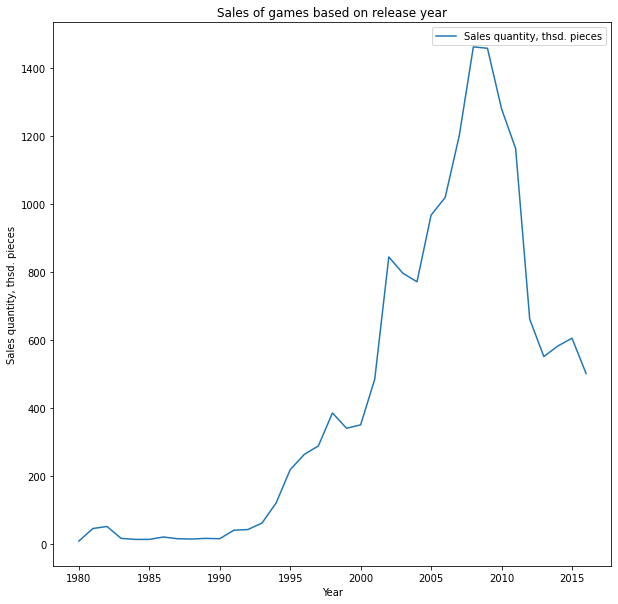

In [68]:
fig, axes = plt.subplots(facecolor='white')

ax = x.plot(figsize =(10, 10), title = 'Sales of games based on release year',\
       label = ('Sales quantity, thsd. pieces'), legend =True)
ax.set_ylabel("Sales quantity, thsd. pieces")
ax.set_xlabel("Year")

**Results**

The graph shows several periods:
* until 1995 - consistently small
* 1995-2008 - sharp rise
* 2008 + drop, but still more game sales
    
The period from 2005 can be considered relevant - when the main stream of games appeared

### How sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

In [69]:
x = pd.pivot_table(df, values='all_sales', index = 'platform', aggfunc='sum')
x.sort_values('all_sales', ascending=False).head(10)

,all_sales
platform,
PS2,1255767
X360,971419
PS3,939646
Wii,907508
DS,806120
PS,730857
GBA,317850
PS4,314140
PSP,294050


In [70]:
x = df.query("platform in ('PS2', 'X360', 'PS3', 'Wii', 'DS')")
x = pd.pivot_table(x, values='all_sales', index='year_of_release', columns = 'platform', aggfunc='sum')
x

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,20.0,NaN,NaN,NaN,NaN
2000,NaN,39170.0,NaN,NaN,NaN
2001,NaN,166429.0,NaN,NaN,NaN
2002,NaN,208360.0,NaN,NaN,NaN
2003,NaN,193050.0,NaN,NaN,NaN
2004,17270.0,212759.0,NaN,NaN,NaN
2005,130140.0,169269.0,190.0,NaN,9220.0
2006,119810.0,104240.0,21440.0,140190.0,51790.0
2007,147230.0,76100.0,73190.0,153409.0,95409.0


Text(0.5, 0, 'Year')

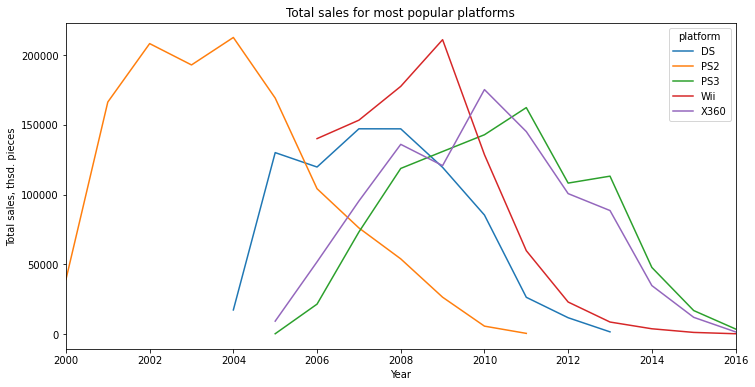

In [71]:
fig, axes = plt.subplots(facecolor='white', figsize=(12,6))

x.plot(xlim = (2000, 2016), ax= axes)
axes.set_title('Total sales for most popular platforms')
axes.set_ylabel("Total sales, thsd. pieces")
axes.set_xlabel("Year")

**Conclusions**

1. The number of sales by year is shown. 5 platforms of the largest sales have been identified.
2. The time of activity of each platform is different, but there are similarities:

* Everyone has a sharp increase, after it there is a 1-3 year peak and then a gradual decline in popularity

* PS2 lasted the longest from 2000 to 2008 (it existed later but on a much smaller scale)

3. For more modern platforms, the active period we can focus on is 6-8 years

### Forecast for 2017

The evaluation period by platform that we can use to make forecast need to:

1. Have a large sales volume
2. have either a positive trend in sales growth in recent years, or near zero (in that case the popularity of the platform should be near its peak)

Since the period of activity of each platform is about 6-8 years, a period of 3 years seems relevant for analysis (since the last 3 years have already been a gradual decline of the platform), but since 2016 is not a full year, it is better to watch 4 years here

### Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.

In [72]:
x = df.query('year_of_release > 2012')
x = pd.pivot_table(x, values='all_sales', index='platform', columns='year_of_release', aggfunc='sum')
x = x.fillna(0)

In [73]:
x['16/15'] = x[2016] / x[2015] * 100
x['15/14'] = x[2015] / x[2014] * 100
x['15/13'] = x[2015] / x[2013] * 100
x['share16'] = x[2016]/x[2016].sum() *100
x['share13-16'] = (x[2016]+ x[2015]+x[2014]+x[2013])\
/(x[2016].sum()+ x[2015].sum()+x[2014].sum()+x[2013].sum()) *100

In [74]:
x

year_of_release,2013,2014,2015,2016,16/15,15/14,15/13,share16,share13-16
platform,,,,,,,,,
3DS,57040.0,43760.0,27780.0,15140.0,54.499640,63.482633,48.702665,11.651531,13.157690
DS,1540.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,0.140988
PC,12660.0,13630.0,8520.0,5250.0,61.619718,62.509171,67.298578,4.040326,3.667528
PS3,113250.0,47759.0,16820.0,3600.0,21.403092,35.218493,14.852097,2.770509,16.609981
PS4,25990.0,100000.0,118900.0,69250.0,58.242220,118.900000,457.483648,53.293828,28.759788
PSP,3380.0,240.0,120.0,0.0,0.000000,50.000000,3.550296,0.000000,0.342400
PSV,10590.0,12160.0,6250.0,4250.0,68.000000,51.398026,59.017941,3.270740,3.044066
Wii,8590.0,3750.0,1140.0,180.0,15.789474,30.400000,13.271246,0.138525,1.250585
WiiU,21650.0,22030.0,16350.0,4600.0,28.134557,74.216977,75.519630,3.540095,5.916932


**Conclusions**

73% of sales from XOne + PS4 - only they have increased sales

We need to note - these are not sales for a specific year, these are sales of games released in a given year!

Therefore, in addition to these 2, you can also consider 3DS, PC

### Plot a box and boxplot of global game sales by platform. Describe the result.

In [75]:
x_plt = df.query("platform in ('PS4', 'XOne', '3DS', 'PC') and year_of_release > 2012")

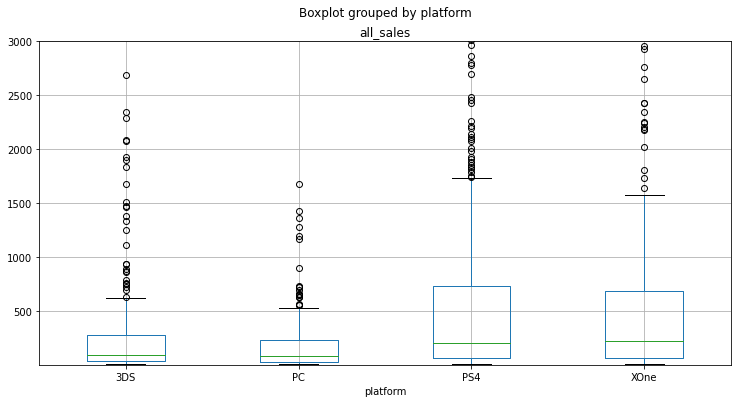

In [76]:
fig, axes = plt.subplots(facecolor='white', figsize=(12, 6))
x_plt.boxplot(column='all_sales', by='platform', ax=axes)
plt.ylim(1, 3000)
plt.show()

**Conclusions**

Median sales are higher for PS4 and XOne, and are comparable between the two, although the spread for PS4 is slightly higher.

PC has the lowest median and small spread

### How sales within one popular platform are impacted by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales

In [77]:
x_scores = df.query("platform in ('PS4', 'XOne', '3DS', 'PC') and year_of_release > 2012 and \
user_score >= 0 and critic_score > 0 ")

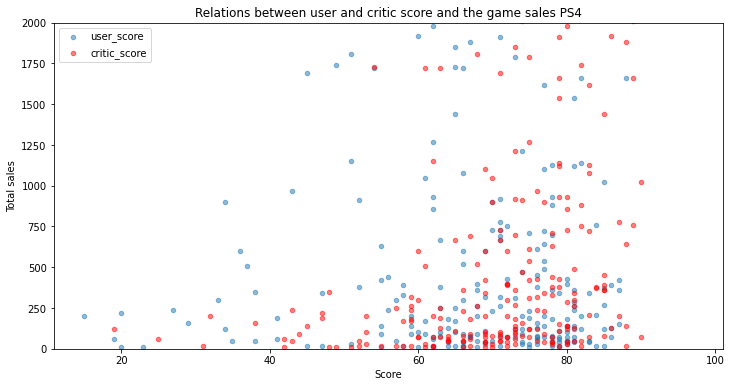

In [78]:
fig, axes = plt.subplots(facecolor='white', figsize=(12,6))

x_scores.query("platform=='PS4'").plot.scatter(x = 'user_score', y = 'all_sales', alpha = 0.5, ax=axes)
plt.ylim(0, 2000)
x_scores.query("platform=='PS4'").plot.scatter(x = 'critic_score', y = 'all_sales', alpha = 0.5, c = 'red', ax=axes)
plt.title('Relations between user and critic score and the game sales PS4' )
plt.xlabel('Score')
plt.ylabel('Total sales')
plt.legend(['user_score','critic_score'])

In [79]:
x_scores.query("platform=='PS4'").corr().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.00,-0.26,-0.19,-0.12,-0.23,-0.02,0.15,-0.23
na_sales,-0.26,1.00,0.71,0.53,0.92,0.41,-0.02,0.89
eu_sales,-0.19,0.71,1.00,0.52,0.94,0.35,-0.05,0.95
jp_sales,-0.12,0.53,0.52,1.00,0.57,0.32,0.17,0.59
other_sales,-0.23,0.92,0.94,0.57,1.00,0.41,-0.04,1.00
critic_score,-0.02,0.41,0.35,0.32,0.41,1.00,0.56,0.41
user_score,0.15,-0.02,-0.05,0.17,-0.04,0.56,1.00,-0.03
all_sales,-0.23,0.89,0.95,0.59,1.00,0.41,-0.03,1.00


### Compare findings with game sales on other platforms

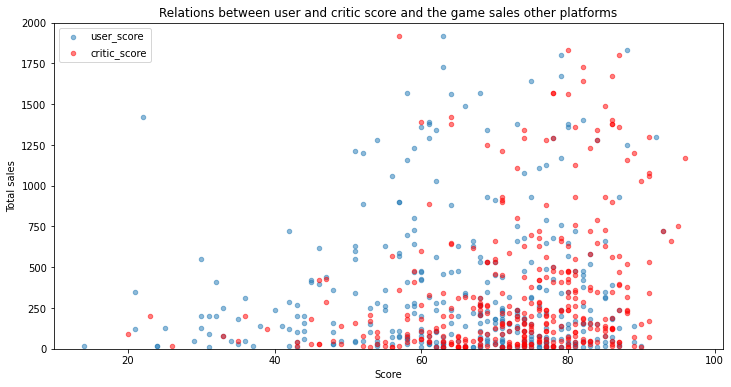

In [80]:
fig, axes = plt.subplots(facecolor='white', figsize=(12,6))


x_scores.query("platform !='PS4'").plot.scatter(x = 'user_score', y = 'all_sales', alpha = 0.5, ax=axes)
x_scores.query("platform !='PS4'").plot.scatter(x = 'critic_score', y = 'all_sales', alpha = 0.5, c = 'red', ax=axes)
plt.ylim(0, 2000)

plt.title('Relations between user and critic score and the game sales other platforms' )
plt.xlabel('Score')
plt.ylabel('Total sales')
plt.legend(['user_score','critic_score'])


In [81]:
x_scores.query("platform !='PS4'").corr().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.00,-0.12,-0.16,-0.11,-0.15,0.11,0.06,-0.16
na_sales,-0.12,1.00,0.69,0.13,0.98,0.27,-0.01,0.93
eu_sales,-0.16,0.69,1.00,0.18,0.82,0.30,-0.05,0.87
jp_sales,-0.11,0.13,0.18,1.00,0.14,0.04,0.17,0.36
other_sales,-0.15,0.98,0.82,0.14,1.00,0.30,-0.03,0.97
critic_score,0.11,0.27,0.30,0.04,0.30,1.00,0.44,0.30
user_score,0.06,-0.01,-0.05,0.17,-0.03,0.44,1.00,0.01
all_sales,-0.16,0.93,0.87,0.36,0.97,0.30,0.01,1.00


Comparing correlations:

In [82]:
x_scores.query("platform=='PS4'").corr().round(2) - x_scores.query("platform !='PS4'").corr().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,0.00,-0.14,-0.03,-0.01,-0.08,-0.13,0.09,-0.07
na_sales,-0.14,0.00,0.02,0.40,-0.06,0.14,-0.01,-0.04
eu_sales,-0.03,0.02,0.00,0.34,0.12,0.05,0.00,0.08
jp_sales,-0.01,0.40,0.34,0.00,0.43,0.28,0.00,0.23
other_sales,-0.08,-0.06,0.12,0.43,0.00,0.11,-0.01,0.03
critic_score,-0.13,0.14,0.05,0.28,0.11,0.00,0.12,0.11
user_score,0.09,-0.01,0.00,0.00,-0.01,0.12,0.00,-0.04
all_sales,-0.07,-0.04,0.08,0.23,0.03,0.11,-0.04,0.00


**Conclusions**

In general, critics' ratings give more accurate estimates of the game's commercial success (for PS4 especially). At the same time, their possibility should not be overestimated - the correlation is about 0.3 (PS4 0.4), which is not so much.

Japan stands out from the markets, where user ratings correlate slightly better with sales volumes. But for PS4 critics score still has a better correlation in japan compared to user score.

### What is the general distribution of games across genres? What are the most profitable genres?

In [83]:
x = pd.pivot_table(df.query('year_of_release > 2012'), values='all_sales', index='genre', \
                   aggfunc=['mean', 'count', 'median', 'max', 'sum'])
x.columns=('mean', 'count', 'median', 'max', 'sum')
x.sort_values(by='mean', ascending=False)

,mean,count,median,max,sum
genre,,,,,
Shooter,1239.627660,188,445,14630,233050
Sports,703.971963,214,240,8580,150650
Platform,576.081081,74,225,4320,42630
Role-Playing,497.210884,294,125,14600,146180
Racing,464.883721,86,115,7090,39980
Fighting,441.375000,80,125,7550,35310
Action,419.375813,769,110,21050,322500
Misc,404.224359,156,105,9180,63059
Simulation,348.412698,63,100,5220,21950


**Conclusions**

Shooter games provide the highest sales, but the highest sales of a single game are in the Action genre

Due to the large number of Action games, they generate the maximum sales volume for the period under review.

## Create a user profile for each region

For each region (NA, EU, JP) show:

* The most popular platforms (top 5). 
* The most popular genres (top 5).
* Does the ESRB rating affect sales in a particular region?

In [84]:
regions = {
    "NA": 'na_sales',
    "EU": 'eu_sales',
    "JP": 'jp_sales',
    "Other": 'other_sales'}
for region in regions:
    x = pd.pivot_table(df, values=regions[region], index = 'platform', aggfunc='sum')
    x = x.sort_values(by=regions[region], ascending=False)
    y = x[regions[region]].sum()
    x['share'] = x[regions[region]] / y *100
    x = x[:5]
    print(x)

          na_sales      share
platform                     
X360        602469  13.685209
PS2         583838  13.262002
Wii         496899  11.287164
PS3         393487   8.938139
DS          382400   8.686295
          eu_sales      share
platform                     
PS2         339289  13.993232
PS3         330289  13.622047
X360        270760  11.166903
Wii         262209  10.814236
PS          213610   8.809877
          jp_sales      share
platform                     
DS          175570  13.532762
PS          139820  10.777188
PS2         139200  10.729399
SNES        116550   8.983559
3DS         100670   7.759544
          other_sales      share
platform                        
PS2            193440  24.445231
PS3            135680  17.146034
X360            85760  10.837588
Wii             79070   9.992165
DS              59260   7.488753


In [85]:
for region in regions:
    x = pd.pivot_table(df.query('year_of_release > 2012'), values=regions[region], \
                       index = 'platform', aggfunc='sum')
    x = x.sort_values(by=regions[region], ascending=False)
    y = x[regions[region]].sum()
    x['share'] = x[regions[region]] / y *100
    x = x[:5]    
    print(x)

          na_sales      share
platform                     
PS4         108740  24.810680
XOne         93120  21.246740
X360         81660  18.631967
PS3          63499  14.488260
3DS          38580   8.802612
          eu_sales      share
platform                     
PS4         141090  35.920872
PS3          67810  17.264117
XOne         51590  13.134579
X360         42520  10.825398
3DS          30980   7.887367
          jp_sales      share
platform                     
3DS          67840  48.072562
PS3          23350  16.546202
PSV          18660  13.222789
PS4          15960  11.309524
WiiU         10880   7.709751
          other_sales      share
platform                        
PS4             48350  40.254766
PS3             26770  22.287903
XOne            14270  11.880776
X360            12110  10.082424
3DS              6320   5.261843


**Conclusions**

For all years:
1. PS2 is the only one in the top 5 in all regions
2. There is no platform dominance in any market

Over the last 4 years:
1. PS4 dominates the mainstream platform everywhere except Japan
2. 3DS is Japan's main platform and has a certain popularity in other regions
3. XOne is close to the leader only in the market of S. America

In [86]:
for region in regions:
    x = pd.pivot_table(df, values=regions[region], index = 'genre', aggfunc='sum')
    x = x.sort_values(by=regions[region], ascending=False)
    y = x[regions[region]].sum()
    x['share'] = x[regions[region]] / y *100
    x = x[:5]    
    print(x)

          na_sales      share
genre                        
Action      879009  19.966872
Sports      684428  15.546924
Shooter     592239  13.452832
Platform    445500  10.119625
Misc        407268   9.251177
         eu_sales      share
genre                       
Action     519128  21.410298
Sports     376789  15.539837
Shooter    317339  13.087952
Racing     236509   9.754296
Misc       212740   8.773996
              jp_sales      share
genre                            
Role-Playing    355410  27.394652
Action          161430  12.442865
Sports          135540  10.447290
Platform        130830  10.084247
Misc            108110   8.333012
         other_sales      share
genre                          
Action        184600  23.328110
Sports        134510  16.998180
Shooter       104110  13.156498
Racing         76100   9.616843
Misc           74390   9.400748


In [87]:
for region in regions:
    x = pd.pivot_table(df.query('year_of_release > 2012'), values=regions[region], \
                       index = 'genre', aggfunc='sum')
    x = x.sort_values(by=regions[region], ascending=False)
    y = x[regions[region]].sum()
    x['share'] = x[regions[region]] / y *100
    x = x[:5]    
    print(x)

              na_sales      share
genre                            
Action          126130  28.778472
Shooter         109780  25.047972
Sports           65270  14.892340
Role-Playing     46510  10.611962
Misc             27489   6.272032
              eu_sales      share
genre                            
Action          118610  30.197566
Shooter          87880  22.373848
Sports           60520  15.408117
Role-Playing     37020   9.425123
Racing           20190   5.140282
              jp_sales      share
genre                            
Role-Playing     51140  36.238662
Action           40490  28.691893
Misc              9440   6.689342
Fighting          7650   5.420918
Shooter           6610   4.683957
              other_sales      share
genre                               
Action              37270  31.029889
Shooter             28780  23.961369
Sports              19450  16.193489
Role-Playing        11510   9.582882
Misc                 6090   5.070352


**Conclusions**


1. The genre interests do not change so much in the regions.
2. Compared to the all-time period in S. America and Europe, the RPG genre has gained popularity in recent years. It was popular in Japan from the start
3. Japan has more genre differences from other regions, while the other 3 are quite similar

In [88]:
for region in regions:
    x = pd.pivot_table(df, values=regions[region], index = 'rating', aggfunc='sum')
    x = x.sort_values(by=regions[region], ascending=False)
    y = x[regions[region]].sum()
    x['share'] = x[regions[region]] / y *100
    x = x[:5]    
    print(x)

        na_sales      share
rating                     
E        2042785  46.402286
T        1116764  25.367526
M         855619  19.435563
E10+      387169   8.794624
        eu_sales      share
rating                     
E        1079928  44.539266
T         603150  24.875601
M         536447  22.124582
E10+      205140   8.460550
        jp_sales      share
rating                     
E         666230  51.352351
T         463500  35.726123
M         109520   8.441694
E10+       58120   4.479832
        other_sales      share
rating                        
E            317760  40.155689
T            206200  26.057726
M            189240  23.914472
E10+          78120   9.872112


In [89]:
for region in regions:
    x = pd.pivot_table(df.query('year_of_release > 2012'), values=regions[region], \
                       index = 'rating', aggfunc='sum')
    x = x.sort_values(by=regions[region], ascending=False)
    y = x[regions[region]].sum()
    x['share'] = x[regions[region]] / y *100
    x = x[:5]    
    print(x)

        na_sales      share
rating                     
M         182550  41.651551
E         123879  28.264872
T          74520  17.002868
E10+       57330  13.080709
        eu_sales      share
rating                     
M         159980  40.730180
E         122650  31.226132
T          64810  16.500331
E10+       45340  11.543358
        jp_sales      share
rating                     
E          53280  37.755102
T          52270  37.039399
M          28650  20.301871
E10+        6920   4.903628
        other_sales      share
rating                        
M             51990  43.285322
E             32480  27.041878
T             22160  18.449754
E10+          13480  11.223046


**Conclusions**

E is the main category of all time, but in recent years, M games have gained maximum popularity, with the exception of Japan

**Conclusions**

If we compare the regions, we can see that America and Europe are quite similar: dynamic games \ high rating \ stationary consoles. Japan differs quite a lot: more interest in portable devices \ slightly different genre preferences \ low age rating 

## Hypotheses

### Average user ratings for Xbox One and PC platforms are the same

**H0**: The average user ratings of the Xbox One and PC platforms are the same

**H1**: Average user ratings for Xbox One and PC platforms are different

In [90]:
user_xbox=df.query('year_of_release > 2012 and platform == "XOne" and user_score > 0')['user_score']
user_pc=df.query('year_of_release > 2012 and platform == "PC" and user_score > 0')['user_score']
alpha = 0.05  
results = st.ttest_ind(user_xbox, user_pc)
print('p-значение:', results.pvalue)
print('Xbox mean', user_xbox.mean())
print('PC mean', user_pc.mean())
if results.pvalue < alpha:
    print('Different')
else:
    print("Can't reject") 

p-значение: 0.15503167687396693
Xbox mean 65.21428571428571
PC mean 62.80379746835443
Can't reject


**Conclusions**

Based on the statistical test, we have no reason to reject the null hypothesis, so user ratings of platforms are close to each other

### Average user ratings for the Action and Sports genres are different

**H0**: Average user ratings for Action and Sports are the same

**H1**: Average user ratings for Action and Sports are different

In [91]:
user_action=df.query('year_of_release > 2012 and genre == "Action" and user_score > 0')['user_score']
user_sports=df.query('year_of_release > 2012 and genre == "Sports" and user_score > 0')['user_score']
alpha = 0.05  
results = st.ttest_ind(user_action, user_sports)
print('p-значение:', results.pvalue)
print('Action mean', user_action.mean())
print('Sports mean', user_sports.mean())
if results.pvalue < alpha:
    print('Different')
else:
    print("Can't reject") 

p-значение: 8.117296239192108e-28
Action mean 68.375
Sports mean 52.38125
Different


**Conclusions**

Based on the statistical test, we have reasons to reject the null hypothesis, so there is a difference between 2 genres

## General conclusion

1. The game market was actively developing in the 2000s. The fall in sales in the 2010s may be partly due to the crisis of 2008, but to a greater extent with the peculiarity of the data - they are not tied to actual sales per year, but to the year of release of the game, so the games of recent years have not yet had time to sell.
2. The main platforms on which they are sold are various consoles, they have a period of active sales of about 8 years
3. Sales of PS4, XOne have grown the most in recent years and will continue to do so. There is also the potential of the 3DS.
4. However, if the first 2 consoles are popular everywhere, then for the 3Ds, the most important market is Japan
5. There are differences in genre preferences between markets, but the main 4 are similar (Action, Shooter, Sports, Role-Playing)
6. Revenues from Shooter games are usually higher than other genres.
7. No difference in rating between PC and Xone detected
8. Ratings for Action and Sport are different
9. There is a correlation between ratings and sales volume, but not too big. For critics' ratings - about 0.3, except for Japan. In Japan, the situation is reversed - there the correlation is higher with user ratings (0.15), while the rating of critics is almost not related to sales.